# Introduction 
When working with machine learning models, it's crucial to ensure that your dataset is well-balanced, meaning there's a minimal difference in the number of samples across different classes. Imbalanced data, where one class significantly outnumbers the others, can severely impact your model's performance.

In datasets with imbalances, we categorize classes into two types:

**Minority Class**: This refers to the class with fewer samples.

**Majority Class**: This is the class that boasts a higher number of samples.

Achieving a balance between these classes is paramount for optimal model performance, and two key techniques come to the rescue: **Under-Sampling** and **Over-Sampling**.

Let's dive into these procedure with a dataset.

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [9]:
#importing the dataset
data = pd.read_csv(r"D:\PROJECTS\ML Project (MLSA)\data\dataset.csv")

In [10]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [11]:
#checking for the null values
data.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [13]:
data.smoking_status.value_counts()

smoking_status
never smoked       16053
formerly smoked     7493
smokes              6562
Name: count, dtype: int64

In [14]:
#converting the gender into 0 and 1 using label encoder.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])

#converting the Residence_type into 0 and 1.
data['Residence_type'] = le.fit_transform(data['Residence_type'])

#converting the ever_married into 0 and 1.
data['ever_married'] = le.fit_transform(data['ever_married'])

#converting the smoking_status into the numerical variable.
data['smoking_status'] = le.fit_transform(data['smoking_status'])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  int32  
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  int32  
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  int32  
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     43400 non-null  int32  
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int32(4), int64(4), object(1)
memory usage: 3.3+ MB


In [16]:
data.work_type.value_counts()

work_type
Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: count, dtype: int64

In [17]:
#We don't need the work_type feature for our classification model.
#So, we can drop that column form the dataset.
data = data.drop(['work_type'],axis = 1)
data

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,1,3.0,0,0,0,0,95.12,18.0,3,0
1,30468,1,58.0,1,0,1,1,87.96,39.2,1,0
2,16523,0,8.0,0,0,0,1,110.89,17.6,3,0
3,56543,0,70.0,0,0,1,0,69.04,35.9,0,0
4,46136,1,14.0,0,0,0,0,161.28,19.1,3,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,0,10.0,0,0,0,1,58.64,20.4,1,0
43396,5450,0,56.0,0,0,1,1,213.61,55.4,0,0
43397,28375,0,82.0,1,0,1,1,91.94,28.9,0,0
43398,27973,1,40.0,0,0,1,1,99.16,33.2,1,0


In [18]:
#Replacing the nan values in bmi feature.
data['bmi'].fillna(data['bmi'].median(),inplace = True)


C:\Users\makaaa\AppData\Local\Temp\ipykernel_9532\1552073590.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].median(),inplace = True)


In [19]:
data.describe()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,36326.142350,0.408894,42.217894,0.093571,0.047512,0.643733,0.501290,104.482750,28.574551,1.591083,0.018041
std,21072.134879,0.492151,22.519649,0.291235,0.212733,0.478901,0.500004,43.111751,7.639769,1.095247,0.133103
min,1.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.000000,10.100000,0.000000,0.000000
25%,18038.500000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,77.540000,23.400000,1.000000,0.000000
50%,36351.500000,0.000000,44.000000,0.000000,0.000000,1.000000,1.000000,91.580000,27.700000,1.000000,0.000000
75%,54514.250000,1.000000,60.000000,0.000000,0.000000,1.000000,1.000000,112.070000,32.600000,3.000000,0.000000
max,72943.000000,2.000000,82.000000,1.000000,1.000000,1.000000,1.000000,291.050000,97.600000,3.000000,1.000000


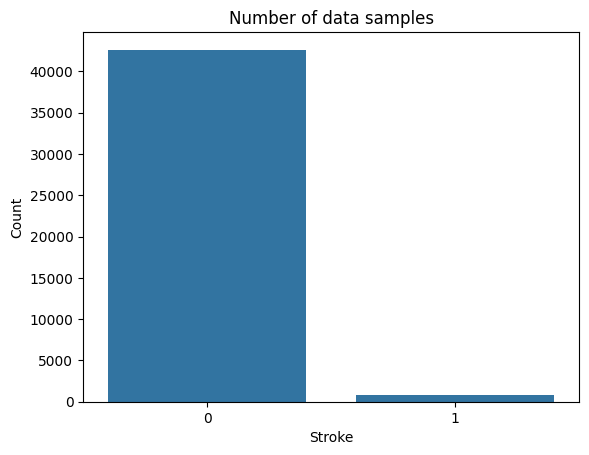

In [45]:
sns.countplot(x = 'stroke', data = data)
plt.title("Number of data samples")
plt.xlabel("Stroke")
plt.ylabel("Count")
plt.show()

In [21]:
#spplitting the data into features and class labels.
X = data.drop(['stroke'],axis = 1)
Y = data['stroke']
Y.value_counts()

stroke
0    42617
1      783
Name: count, dtype: int64

In [22]:
#splitting the dataset for training and testing the model.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y)

In [23]:
Y_train.value_counts()

stroke
0    29832
1      548
Name: count, dtype: int64

In [24]:
#Applying KNN model on the dataset.
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5, 
                           metric = 'minkowski', 
                           p = 1)
KNN.fit(X_train, Y_train)


KNeighborsClassifier(p=1)

In [25]:
Y_pred = KNN.predict(X_test)

In [26]:
#Finding the accuracy of the KNN model.
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, Y_pred)
print("The accuracy of the model is %.2f"%(acc*100),"%")

The accuracy of the model is 98.20 %


In [27]:
#We are getting the accuracy as good but it is not a good model. lets see that by the confusion matrics.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[12785,     0],
       [  234,     1]], dtype=int64)

In [28]:
import site
print(site.getsitepackages())


['c:\\Users\\makaaa\\AppData\\Local\\Programs\\Python\\Python312', 'c:\\Users\\makaaa\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages']


# Over-Sampling

Even though the accuracy is 98% the model is not predicting the class 1 samples. Because the total number of samples of class 1 in the train data is less for the model to get trained on it. So, now apply the **Over-sampling** technique and see the difference in the model predictions and accuracy.

In [29]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resample1, Y_resample1 = ros.fit_resample(X_train,Y_train)

In [30]:
print("After random over-sampling the no.of classes spiltted : ")
Y_resample1.value_counts()

After random over-sampling the no.of classes spiltted : 


stroke
0    29832
1    29832
Name: count, dtype: int64

In [31]:
#Applying the KNN model for the Over-sampled data.
KNNov = KNeighborsClassifier(n_neighbors = 5, 
                           metric = 'minkowski', 
                           p = 1)
KNNov.fit(X_resample1,Y_resample1)
Y_pred1 = KNNov.predict(X_test)

In [32]:
#accuracy of the Over-sampled KNN model.
acc1 = accuracy_score(Y_test, Y_pred1)
print("The accuracy of the model is %.2f"%(acc1*100),"%")

The accuracy of the model is 93.85 %


In [33]:
cm = confusion_matrix(Y_test, Y_pred1)
cm

array([[12192,   593],
       [  208,    27]], dtype=int64)

# Under-Sampling

Now, look what will happen when we apply the **under-sampling** technique to the data.

In [34]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_resample2,Y_resample2 = rus.fit_resample(X_train, Y_train)

In [35]:
print("After random under-sampling the no.of classes spiltted : ")
Y_resample2.value_counts()

After random under-sampling the no.of classes spiltted : 


stroke
0    548
1    548
Name: count, dtype: int64

In [36]:
#Applying the KNN model to modified data.
KNNun = KNeighborsClassifier(n_neighbors = 5, 
                           metric = 'minkowski', 
                           p = 1)
KNNun.fit(X_resample2, Y_resample2)
Y_pred2 = KNNun.predict(X_test)

In [37]:
#accuracy of the Over-sampled KNN model.
acc2 = accuracy_score(Y_test, Y_pred2)
print("The accuracy of the model is %.2f"%(acc2*100),"%")

The accuracy of the model is 53.70 %


In [38]:
cm = confusion_matrix(Y_test, Y_pred2)
cm

array([[6860, 5925],
       [ 103,  132]], dtype=int64)

# Observation


In [39]:
# Visualizing the accuracy of all the models and comparing.
from tabulate import tabulate

head = ["Sno", "Model", "accuracy in %"]
sno = [1, 2, 3]
models = [
    "KNN",
    "KNN with Over_ Sampling", 
    "KNN with Under_Sampling"
]
acc = [round(acc*100,2), round(acc1*100,2), round(acc2*100,2)]
mydata = list(zip(sno, models, acc))

print(tabulate(mydata, headers=head, tablefmt="grid"))

+-------+-------------------------+-----------------+
|   Sno | Model                   |   accuracy in % |
+=======+=========================+=================+
|     1 | KNN                     |           98.2  |
+-------+-------------------------+-----------------+
|     2 | KNN with Over_ Sampling |           93.85 |
+-------+-------------------------+-----------------+
|     3 | KNN with Under_Sampling |           53.7  |
+-------+-------------------------+-----------------+


# Downsides of the Resampling techniques

While both oversampling and undersampling aim to address the class imbalance by giving more weight to the minority class or by taking fewer samples from the majority class, they introduce their own challenges.

**Undersampling:** This approach removes data points from the majority class, potentially discarding valuable information and hindering the model's ability to learn the full spectrum of its features.

**Oversampling:** Duplicating data points from the minority class can lead to overfitting as the model learns the duplicated instances more thoroughly, potentially sacrificing generalizability on unseen data.

Fouther techniques must be applied to increase the performance of the model.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

class LogisticRegression_imp:
    def __init__(self, learning_rate=0.01, num_iterations=1000, threshold=0.5):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.threshold = threshold
        self.weights = None
        self.bias = None
        self.mean = None
        self.std = None
        self.losses = []  # List to store loss values during training

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _standardize(self, X, fit=False):
        if fit:
            self.mean = np.mean(X, axis=0)
            self.std = np.std(X, axis=0)
        X_standardized = (X - self.mean) / self.std
        return X_standardized

    def _initialize_parameters(self, num_features):
        self.weights = np.zeros(num_features)
        self.bias = 0

    def fit(self, X, y):
        X = self._standardize(X, fit=True)
        num_samples, num_features = X.shape
        self._initialize_parameters(num_features)
        W1 = y.shape[0] / (2 * y.sum())
        W0 = y.shape[0] / (2 * (y.shape[0] - y.sum()))

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self._sigmoid(linear_model)

            # Calculate loss
            loss = (-1 / num_samples) * np.sum(
                W1 * y * np.log(predictions) + W0 * (1 - y) * np.log(1 - predictions)
            )

            # Append loss to list for plotting
            self.losses.append(loss)

            # Gradient descent
            dw = (1 / num_samples) * np.dot(X.T, -(W1 * y * (1 - predictions)) + W0 * (1 - y) * predictions)
            db = (1 / num_samples) * np.sum(-(W1 * y * (1 - predictions)) + W0 * (1 - y) * predictions)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

        # Plot loss curve
        plt.plot(range(1, self.num_iterations + 1), self.losses)
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.title('Loss Curve')
        plt.show()

        # Print final loss value
        print('Final Loss:', self.losses[-1])

    def predict(self, X):
        X = self._standardize(X)
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self._sigmoid(linear_model)
        return np.where(predictions >= self.threshold, 1, 0)

    def evaluate(self, X, y):
        X = self._standardize(X)
        y_pred = self.predict(X)
        # Calculate accuracy
        accuracy = accuracy_score(y, y_pred)
        print("Accuracy:", accuracy)

        # Calculate precision
        precision = precision_score(y, y_pred)
        print("Precision:", precision)

        # Calculate recall
        recall = recall_score(y, y_pred)
        print("Recall:", recall)

        # Calculate F1 score
        f1 = f1_score(y, y_pred)
        print("F1 Score:", f1)

        # Generate confusion matrix
        conf_matrix = confusion_matrix(y, y_pred)

        # Plot confusion matrix using seaborn
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()

        # plot pie chart
        # plot pie chart
        labels = ['Not Stroke', 'Stroke']
        sizes = [y_pred.shape[0] - y_pred.sum(), y_pred.sum()]
        explode = (0, 0.1)

        fig1, ax1 = plt.subplots()
        ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
                shadow=True, startangle=90)
        ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.title('Predicted Class Distribution')
        plt.show()

        

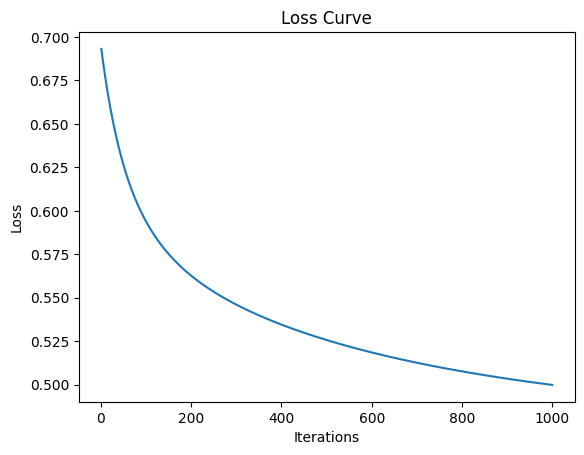

Final Loss: 0.4998763865864157
Accuracy: 0.9407066052227343
Precision: 0.07849293563579278
Recall: 0.2127659574468085
F1 Score: 0.11467889908256881


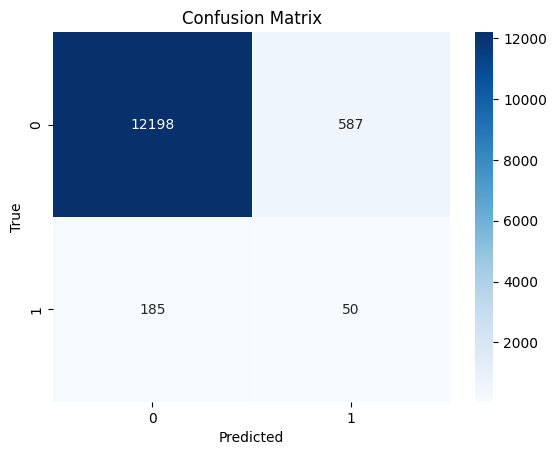

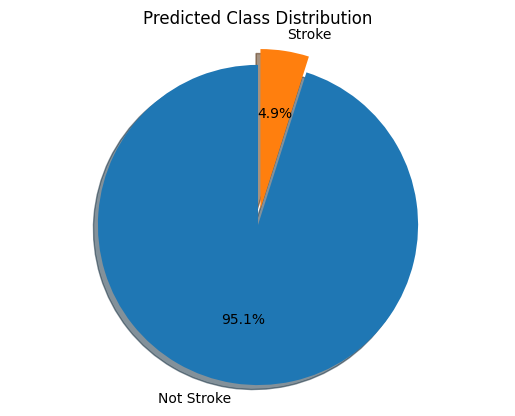

In [41]:
# checking for default smote
model1 = LogisticRegression_imp(threshold = 0.4) 
model1.fit(X_train, Y_train)
model1.evaluate(X_test,Y_test)

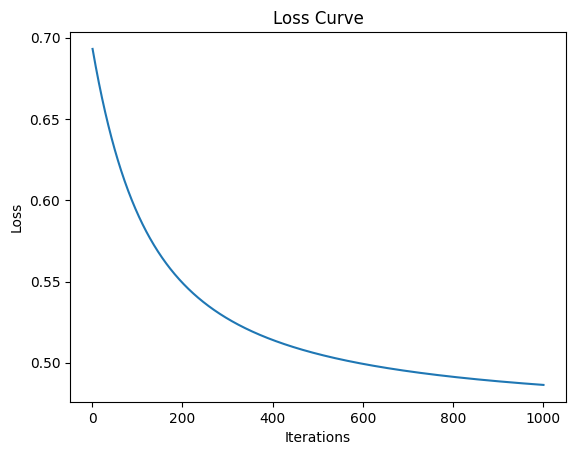

Final Loss: 0.48636746867832426
Accuracy: 0.9727342549923195
Precision: 0.07142857142857142
Recall: 0.0425531914893617
F1 Score: 0.05333333333333334


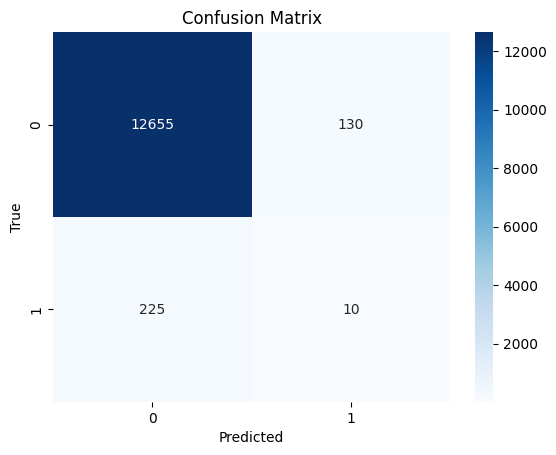

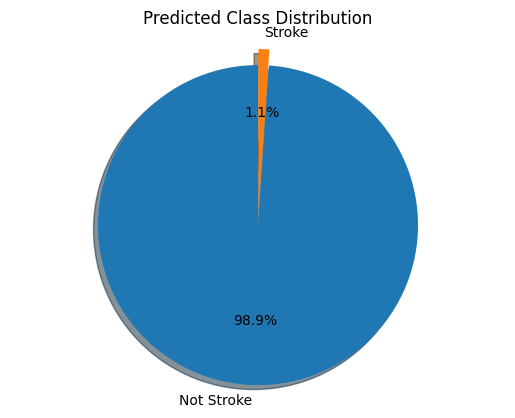

In [42]:
# checking for default randomoversampling
model2 = LogisticRegression_imp() 
model2.fit(X_resample1, Y_resample1)
model2.evaluate(X_test, Y_test)

In [43]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
from sklearn.linear_model import LogisticRegression
import numpy as np

class StrokePredictionGUI:
    def __init__(self, root):
        self.root = root
        self.root.title("Stroke Prediction")

        self.main_frame = ttk.Frame(self.root)
        self.main_frame.pack(padx=10, pady=10)

        self.age_label = ttk.Label(self.main_frame, text="Age:")
        self.age_label.grid(row=0, column=0, padx=5, pady=5, sticky="w")
        self.age_entry = ttk.Entry(self.main_frame)
        self.age_entry.grid(row=0, column=1, padx=5, pady=5)

        self.bmi_label = ttk.Label(self.main_frame, text="BMI:")
        self.bmi_label.grid(row=1, column=0, padx=5, pady=5, sticky="w")
        self.bmi_entry = ttk.Entry(self.main_frame)
        self.bmi_entry.grid(row=1, column=1, padx=5, pady=5)

        self.smoking_status_label = ttk.Label(self.main_frame, text="Smoking Status:")
        self.smoking_status_label.grid(row=2, column=0, padx=5, pady=5, sticky="w")
        self.smoking_status_entry = ttk.Entry(self.main_frame)
        self.smoking_status_entry.grid(row=2, column=1, padx=5, pady=5)

        self.predict_button = ttk.Button(self.main_frame, text="Predict", command=self.predict_stroke)
        self.predict_button.grid(row=3, column=0, columnspan=2, padx=5, pady=5)

    def predict_stroke(self):
        try:
            age = float(self.age_entry.get())
            bmi = float(self.bmi_entry.get())
            smoking_status = float(self.smoking_status_entry.get())

            # Mock prediction based on the provided data
            if age > 50 and bmi > 30 and smoking_status == 1:
                prediction = "High Risk of Stroke"
            else:
                prediction = "Low Risk of Stroke"

            messagebox.showinfo("Stroke Prediction Result", f"The predicted risk of stroke is: {prediction}")
        
        except ValueError:
            messagebox.showerror("Error", "Please enter valid numerical values for Age, BMI, and Smoking Status")


if __name__ == "__main__":
    root = tk.Tk()
    app = StrokePredictionGUI(root)
    root.mainloop()
